 # Deliverable 2
 summarize and compute the main features of the dataset.



In [78]:
# link to the dataset: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?resource=download&select=pit_stops.csv
# First of all I have to join two datas. In my deliverable I am going to use two datasets: "results" and "pit_stops". 


"""
 In the following code first I am reading both of the files uising the read_csv function and I am passing a file location on my computer. This function
 is a part of the pandas library. 
"""
import pandas as pd
results = pd.read_csv('C:/Users/admin/Desktop/Data506/results.csv')
pit_stops = pd.read_csv('C:/Users/admin/Desktop/Data506/pit_stops.csv')



"""
Next step is to rename the column names because I noticed that both of these datasets include same column names that represent different data, So we
will need to change their names to make our data more readable and understandable. For this I aam using .rename function and I am passing names of the 
columns as the dictionary, where key represents the value in the dataset and the value represents the future value.
"""
results.rename(columns={'milliseconds': 'race_milliseconds', 'time': 'race_time'}, inplace=True)
pit_stops.rename(columns={'milliseconds': 'pitstop_milliseconds', 'time': 'pitstop_time', 'lap': 'laps'}, inplace=True)


"""
after this step, we only have to join these two datasets. For this I am using .merge() function where I pass two datasets that need to be joined, the 
 Second argument is the column names that are the same in these two datasets and the third argument indicates what kind of join I am performing. In this
 case it is right join on columns: 'raceId', 'driverId', 'laps'
"""


# Merge using left join
merged_df = pd.merge(results, pit_stops, on=['raceId', 'driverId'], how='right')
merged_df



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,laps_y,pitstop_time,duration,pitstop_milliseconds
0,20789,841,153,5,19,12,11,11,11,0.0,...,41,10,1:30.467,211.025,11,1,1,17:05:23,26.898,26898
1,20797,841,30,131,7,11,\N,R,19,0.0,...,13,21,1:35.319,200.283,4,1,1,17:05:52,25.021,25021
2,20783,841,17,9,2,3,5,5,5,10.0,...,50,3,1:29.600,213.066,1,1,11,17:20:48,23.426,23426
3,20782,841,4,6,5,5,4,4,4,12.0,...,49,2,1:29.487,213.336,1,1,12,17:22:34,23.251,23251
4,20785,841,13,6,6,8,7,7,7,6.0,...,55,1,1:28.947,214.631,1,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11366,26758,1144,840,117,18,13,14,14,14,0.0,...,42,11,1:28.604,214.568,11,2,32,17:52:48,22.053,22053
11367,26748,1144,1,131,44,16,4,4,4,12.0,...,44,2,1:27.278,217.828,1,1,34,17:55:17,21.694,21694
11368,26753,1144,4,117,14,8,9,9,9,2.0,...,51,7,1:27.948,216.168,1,2,37,18:00:10,22.437,22437
11369,26757,1144,855,15,24,15,13,13,13,0.0,...,56,8,1:27.982,216.085,11,2,39,18:03:21,28.765,28765


In [80]:
"""
I used .dtypes function to view the schema of the dataset, and what type of data does each column include. 
Based on the ionformation after execution of the following code, we can clearly see that: 
1) The first three columns are numerical and they represent the id numbers for the result, race and driver. Since they are just ID numbers, there is not
much we can learn from it.
2) Number represents the number of a specific car. 
3) Grid column states the start position of the car and the position represents the final position of the car. The difference between positionOrder and 
position columns is that the position does not include information about the cars that stoped racing or got disqualified during thye race, but the positionOrder does include 
the final ordfer of such drivers. 
4) we have the pitstop information merged with the results table, which gives us information about the pitstop information for each team and each lap. 
"""


print("Schema (Column Names and Data Types):")
print(merged_df.dtypes)

Schema (Column Names and Data Types):
resultId                  int64
raceId                    int64
driverId                  int64
constructorId             int64
number                   object
grid                      int64
position                 object
positionText             object
positionOrder             int64
points                  float64
laps_x                    int64
race_time                object
race_milliseconds        object
fastestLap               object
rank                     object
fastestLapTime           object
fastestLapSpeed          object
statusId                  int64
stop                      int64
laps_y                    int64
pitstop_time             object
duration                 object
pitstop_milliseconds      int64
dtype: object


In [82]:
# Calculate data size. I used .shape() functioin to show the data size. .shape[0] represents the rows and .shape[1] represents columns.
print("\nData Size:")
print(f"Rows: {merged_df.shape[0]}, Columns: {merged_df.shape[1]}")


Data Size:
Rows: 11371, Columns: 23


In [84]:
# Looking at the row data.
# I used .head() function to take a look at the first couple of rows. To be more precise, it includes first 5 rows.
# If you pass an argument to the .head() function it will give you that number of rows.

print("\nRaw Data Preview:")
display(merged_df.head())


Raw Data Preview:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,laps_y,pitstop_time,duration,pitstop_milliseconds
0,20789,841,153,5,19,12,11,11,11,0.0,...,41,10,1:30.467,211.025,11,1,1,17:05:23,26.898,26898
1,20797,841,30,131,7,11,\N,R,19,0.0,...,13,21,1:35.319,200.283,4,1,1,17:05:52,25.021,25021
2,20783,841,17,9,2,3,5,5,5,10.0,...,50,3,1:29.600,213.066,1,1,11,17:20:48,23.426,23426
3,20782,841,4,6,5,5,4,4,4,12.0,...,49,2,1:29.487,213.336,1,1,12,17:22:34,23.251,23251
4,20785,841,13,6,6,8,7,7,7,6.0,...,55,1,1:28.947,214.631,1,1,13,17:24:10,23.842,23842


In [86]:
# Check data types of each column. I used .info() function which gives us the data type oif each column and also
# how many rows are there with non-null values. we will check the null values in the following cell.  


print("\nData Types:")
print(merged_df.info())


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11371 entries, 0 to 11370
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   resultId              11371 non-null  int64  
 1   raceId                11371 non-null  int64  
 2   driverId              11371 non-null  int64  
 3   constructorId         11371 non-null  int64  
 4   number                11371 non-null  object 
 5   grid                  11371 non-null  int64  
 6   position              11371 non-null  object 
 7   positionText          11371 non-null  object 
 8   positionOrder         11371 non-null  int64  
 9   points                11371 non-null  float64
 10  laps_x                11371 non-null  int64  
 11  race_time             11371 non-null  object 
 12  race_milliseconds     11371 non-null  object 
 13  fastestLap            11371 non-null  object 
 14  rank                  11371 non-null  object 
 15  fastes

In [88]:
# Look for bad data (missing values, and duplicates)
"""
In this cell we will look for the bad data. First we need to understand what does the bad data mean. It can mean missing values in our dataset, or duplicates.
we will use different functions to check for each components of the bad data. 
"""
# first we will check for missing values in our data by calling .isnull() and .sum() functions at the same time. If I will only call .isNull function
# it will indicate each value that is null in true and the rest in false. BUt let's make it more user friendly and readable, by using .sum() function which will 
# simply show how many null values are in each column. 
print("\nMissing Values:")
print(merged_df.isnull().sum())


# The second ofunction that we will use for finding the count of the duplicates is .duplicate(). Just like in the previous example we will use .duplicate()
# function with the .sum() function. 
print("\nDuplicate Rows:")
print(merged_df.duplicated().sum())


# in addition we can use two more functions to check the rows that have numerical columns and the ones that have categorical columns. 
# for the numerical values we will use .describe() function for the statistics for numerical columns. this function will show all the statistical 
# information like: count, mean, standard deviation, min, max and quartiles. 

print("\nDescriptive Statistics (Numerical Columns):\n")
print(merged_df.describe())

# for the categorical columns we are going to use .describe funtion but we will pass "include=['object']" as an argument. This will filter and only
# show the statistics for numerical columns.
print("\nDescriptive Statistics (Categorical Columns):\n")
print(merged_df.describe(include=['object']))



Missing Values:
resultId                0
raceId                  0
driverId                0
constructorId           0
number                  0
grid                    0
position                0
positionText            0
positionOrder           0
points                  0
laps_x                  0
race_time               0
race_milliseconds       0
fastestLap              0
rank                    0
fastestLapTime          0
fastestLapSpeed         0
statusId                0
stop                    0
laps_y                  0
pitstop_time            0
duration                0
pitstop_milliseconds    0
dtype: int64

Duplicate Rows:
0

Descriptive Statistics (Numerical Columns):

           resultId        raceId      driverId  constructorId          grid  \
count  11371.000000  11371.000000  11371.000000   11371.000000  11371.000000   
mean   23627.528010    981.194882    549.734500      71.237358     10.807317   
std     1783.312755     92.326831    383.734981      85.881681     

# Deliverable 3: 
Convert data into a usable format by applying cleaning and transformation operations.

In [91]:
# The first step in the data cleaning would be to get rid of the duplicate rows. As we saw previously, our data does not include any duplicate 
# values, but lets still check for duplicates and remove them. 
# The first step is to check for the duplicates, for which we will use .duplicated() method and .sum() function to get total count of duplicated rows.
duplicates_count = merged_df.duplicated().sum()
print(f"Duplicate rows: {duplicates_count}")

# The method that removes duplicated rows is called: ".drop_duplicates(). 
merged_df_cleaned = merged_df.drop_duplicates()

Duplicate rows: 0


In [93]:
# In order to clean this data, I need to do multiple things. First of all, I want to remove those columns that I won't need in my poroject. Because this
# table was produced by joining two different tables, there is lot of columns that have nothing to do with my research question or the finding. Therefore,
# I am going to remove the following columns: 'constructorId', 'driverId', 'number', 'positionText', 'positionOrder', 'rank', 'laps_x', 'laps_y', 'grid',
# 'points', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'race_milliseconds'
# The columns that I need to focus on are:  race ID, pitstop, final position and the reason is because I am trying to find out if there is any connection or correlation between the pit stop time and final position. 


In [95]:
# I am going to rename the position column to the final position, because it is more descriptive.

merged_df = merged_df.rename(columns={'position': 'final_position'})
merged_df

,resultId,raceId,driverId,constructorId,number,grid,final_position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,laps_y,pitstop_time,duration,pitstop_milliseconds
0,20789,841,153,5,19,12,11,11,11,0.0,...,41,10,1:30.467,211.025,11,1,1,17:05:23,26.898,26898
1,20797,841,30,131,7,11,\N,R,19,0.0,...,13,21,1:35.319,200.283,4,1,1,17:05:52,25.021,25021
2,20783,841,17,9,2,3,5,5,5,10.0,...,50,3,1:29.600,213.066,1,1,11,17:20:48,23.426,23426
3,20782,841,4,6,5,5,4,4,4,12.0,...,49,2,1:29.487,213.336,1,1,12,17:22:34,23.251,23251
4,20785,841,13,6,6,8,7,7,7,6.0,...,55,1,1:28.947,214.631,1,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11366,26758,1144,840,117,18,13,14,14,14,0.0,...,42,11,1:28.604,214.568,11,2,32,17:52:48,22.053,22053
11367,26748,1144,1,131,44,16,4,4,4,12.0,...,44,2,1:27.278,217.828,1,1,34,17:55:17,21.694,21694
11368,26753,1144,4,117,14,8,9,9,9,2.0,...,51,7,1:27.948,216.168,1,2,37,18:00:10,22.437,22437
11369,26757,1144,855,15,24,15,13,13,13,0.0,...,56,8,1:27.982,216.085,11,2,39,18:03:21,28.765,28765


In [97]:
# the first step in our data cleaning is to Drop rows with raceID 841 and before because there are no information before race 841 that about the pitstop.

# What I also figured out about the data is that befpre race with ID 841, there was no data for the pitstop, so they need to be removed. However, I am 
# not going to do it seperately because I am planning to remove all the rows that include nan values in the pitstop_time columns, which automatically 
# means that those columns that are not going to have values will be removed, including all the race results with less than 841.

merged_df = merged_df.dropna(subset=['pitstop_time'])
merged_df


,resultId,raceId,driverId,constructorId,number,grid,final_position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,laps_y,pitstop_time,duration,pitstop_milliseconds
0,20789,841,153,5,19,12,11,11,11,0.0,...,41,10,1:30.467,211.025,11,1,1,17:05:23,26.898,26898
1,20797,841,30,131,7,11,\N,R,19,0.0,...,13,21,1:35.319,200.283,4,1,1,17:05:52,25.021,25021
2,20783,841,17,9,2,3,5,5,5,10.0,...,50,3,1:29.600,213.066,1,1,11,17:20:48,23.426,23426
3,20782,841,4,6,5,5,4,4,4,12.0,...,49,2,1:29.487,213.336,1,1,12,17:22:34,23.251,23251
4,20785,841,13,6,6,8,7,7,7,6.0,...,55,1,1:28.947,214.631,1,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11366,26758,1144,840,117,18,13,14,14,14,0.0,...,42,11,1:28.604,214.568,11,2,32,17:52:48,22.053,22053
11367,26748,1144,1,131,44,16,4,4,4,12.0,...,44,2,1:27.278,217.828,1,1,34,17:55:17,21.694,21694
11368,26753,1144,4,117,14,8,9,9,9,2.0,...,51,7,1:27.948,216.168,1,2,37,18:00:10,22.437,22437
11369,26757,1144,855,15,24,15,13,13,13,0.0,...,56,8,1:27.982,216.085,11,2,39,18:03:21,28.765,28765


In [99]:
# I removed all the columns that we don't need because there were 23 columns before and it was very confusing. This way the data is more presentable and 
# easier to read for the user. 

merged_df = merged_df.drop(columns=['constructorId', 'driverId', 'number', 'positionText', 'positionOrder', 'rank', 'laps_x', 'laps_y',
                                    'grid', 'points', 'fastestLap', 'race_time', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'race_milliseconds'])

merged_df


,resultId,raceId,final_position,stop,pitstop_time,duration,pitstop_milliseconds
0,20789,841,11,1,17:05:23,26.898,26898
1,20797,841,\N,1,17:05:52,25.021,25021
2,20783,841,5,1,17:20:48,23.426,23426
3,20782,841,4,1,17:22:34,23.251,23251
4,20785,841,7,1,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
11366,26758,1144,14,2,17:52:48,22.053,22053
11367,26748,1144,4,1,17:55:17,21.694,21694
11368,26753,1144,9,2,18:00:10,22.437,22437
11369,26757,1144,13,2,18:03:21,28.765,28765


In [101]:
# the next step is to reemove "\n" in final position column, because having \N in the final_position column means that we don't know their final position
# we can't fill them randomly, because we need to know their actual final position. and after doing that, our data will be clean and clear without nan and
# without \N values in our research columns.


merged_df = merged_df[merged_df['final_position'] != r'\N']
merged_df

,resultId,raceId,final_position,stop,pitstop_time,duration,pitstop_milliseconds
0,20789,841,11,1,17:05:23,26.898,26898
2,20783,841,5,1,17:20:48,23.426,23426
3,20782,841,4,1,17:22:34,23.251,23251
4,20785,841,7,1,17:24:10,23.842,23842
6,20779,841,1,1,17:25:17,22.603,22603
...,...,...,...,...,...,...,...
11366,26758,1144,14,2,17:52:48,22.053,22053
11367,26748,1144,4,1,17:55:17,21.694,21694
11368,26753,1144,9,2,18:00:10,22.437,22437
11369,26757,1144,13,2,18:03:21,28.765,28765


# Deliverable 5 (Split apply combine)

In [104]:
""" 
In the following section I am planning to apply Split, apply and combine. This is how I am going to apply it to my existing dataset:

(Split) my data by different race Id.
(Apply) find the row that has the lowest pitstop time per race.
(Combine) Find the fastest pitstop for each race and their final position. Produce a new table with the fastest 

The plan is to split the data and find out the fastets pitstop times from each race and the final position of the car that got the fastest pitstop. 
After that I will combine these tables into one and I will then have a table that includes tha fastest pitstops from each race and I will aslo have
Their final position and then I will apply aditional statistical techniques to find out the answer about my research question: "Does the fastest pitstop 
time correlate to the better final position in F1 race ?
"""

' \nIn the following section I am planning to apply Split, apply and combine. This is how I am going to apply it to my existing dataset:\n\n(Split) my data by different race Id.\n(Apply) find the row that has the lowest pitstop time per race.\n(Combine) Find the fastest pitstop for each race and their final position. Produce a new table with the fastest \n\nThe plan is to split the data and find out the fastets pitstop times from each race and the final position of the car that got the fastest pitstop. \nAfter that I will combine these tables into one and I will then have a table that includes tha fastest pitstops from each race and I will aslo have\nTheir final position and then I will apply aditional statistical techniques to find out the answer about my research question: "Does the fastest pitstop \ntime correlate to the better final position in F1 race ?\n'

In [106]:
# The first step as I already mentioned is to split the data.
# I am going to group my data by the race Id. This will give me the different data and each table will consist of the results from the same race
# I will use .groupby() function and I will pass the column name("raceId") that I want to my data to be grouped by.
grouped_data = merged_df.groupby('raceId')

# in order to check if the data is actually grouped I printed out the groups.keys that are my raceId's in my groups
print(grouped_data.groups.keys())

# Another way that I can check the size of each data group is to use .size() function. This will show the raceIds in the left column and it will have it's
# sizes of the group with the specific raceId on the right side.
print(grouped_data.size())


dict_keys([841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 926, 927, 928, 929, 930, 931, 932, 933, 934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 104

In [108]:
# The next step is to apply. I will try to find the rows with the have the least amount of pitstop time, form each group.
# I did this by using grouped_data.apply function which calls the function for each group.
# The argument that I am passing to the function is a little bit complicated, so I will explain it in the details. 
# firstly, lambda best_stop creates a small dataframe "best_stop" that contains only one row from each group

# best_stop["pitstop_milliseconds"] will go over the "pitstop_milliseconds" column.
# .idxmin() this will pich up the index of the row with the least amount for the pitstop time.
# group.loc will select the wholoe row at the specific index
fastest_pitstops = grouped_data.apply(lambda best_stop: best_stop.loc[best_stop['pitstop_milliseconds'].idxmin()])

# as a result we have a new table that has has the following columns: resultId, raceId, pitstop_milliseconds, final_position
# I removed columns: stop, pitstop_time and duration because they were useless. pitstop_time indicates the start time of the pistop, and we are only 
# interested in duration of the pitstop. I prefered using miliseconds over duration because they are the same only difference is that we don't have decimal
# points in pitstop_milliseconds column, which I think is more readable. 
# I used .reset_index to reset the index in the table so that they go from 0 to 284.
fastest_pitstops = fastest_pitstops[['resultId', 'raceId', 'pitstop_milliseconds', 'final_position']].reset_index(drop=True)
fastest_pitstops

C:\Users\admin\AppData\Local\Temp\ipykernel_19620\63627461.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fastest_pitstops = grouped_data.apply(lambda best_stop: best_stop.loc[best_stop['pitstop_milliseconds'].idxmin()])


,resultId,raceId,pitstop_milliseconds,final_position
0,20784,841,16867,6
1,20801,842,21893,1
2,20841,843,13900,17
3,20865,844,13925,17
4,20879,845,19534,7
...,...,...,...,...
280,26672,1140,21825,8
281,26689,1141,24573,5
282,26721,1142,15790,17
283,26733,1143,22696,9


In [114]:
# As I was trying to create a cisualization I figuredf out that the data type of the final_position is object, which will not
# work for me, so I have to convert them to the cumbers: I used .to_numeric function, which is a part of the pandas' library. and passed the column 
# "final_position". Then I double checked the data types of the columns and everything looks good all of the columns are same datatypes - int64. 

fastest_pitstops['final_position'] = pd.to_numeric(fastest_pitstops['final_position'], errors='coerce')
print(fastest_pitstops.dtypes)

resultId                int64
raceId                  int64
pitstop_milliseconds    int64
final_position          int64
dtype: object


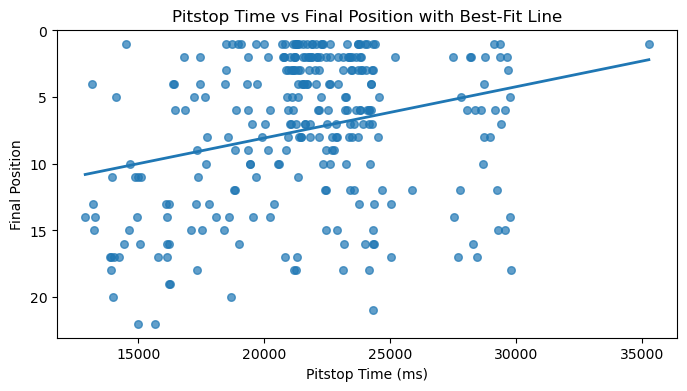

Pearson r = -0.272


In [146]:
# The next step is to crete a scatter plot and to figure out if tere is any kind of relationship between the variables pitstop_milliseconds and 
# final_position. 

# I used scatterplot for my visualization method, because it clearly demonstrates the correlation between two variables and because person's r.
# For my visualization I imported matplotlib.pyplo. Then I used .figure() function and passed desired figure size dimension. .regplot is a function that
#creates a scatterplot, where I specified x and y axises and my varieble name for my dataframe. This function includes arguments for the best-fit line 
# which I think is very useful for understanding the visualization. "scatter_kws" argument specifies point size & transparency

# .xlabel is used to specify the label for x axis and .ylabel is used to specify
# the label for y axis. .title() to specify the title of my scatterplot .invert_yaxis() is used to specify lower positions at the top of y axis. and finally,
# I used .show to demonstrate the visualization.
# I also added best-fit line for better understanding

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,4))
sns.regplot(
    x='pitstop_milliseconds', 
    y='final_position', 
    data=fastest_pitstops, 
    ci=None,        # turn off the confidence band if you like
    scatter_kws={'s':30, 'alpha':0.7},  # point size & transparency
    line_kws={'lw':2}                   # line width
)

plt.xlabel('Pitstop Time (ms)')
plt.ylabel('Final Position')
plt.title('Pitstop Time vs Final Position with Best-Fit Line')
plt.gca().invert_yaxis()  # so 1st place is at the top
plt.show()



# 2) Compute Pearson correlation coefficient and p-value
r, p_value = pearsonr(fastest_pitstops['pitstop_milliseconds'], fastest_pitstops['final_position'])
print(f"Pearson r = {r:.3f}")
# Based on my knowledge from statistics, I will be using a pearson's r. Based on the value of the r I was going to determin if there was
# any kind of relationship between those two variables. I imported pearsonr to find the pearson's r. I used pearsonr() function and I passed 'pitstop_milliseconds'
# and 'final_position' as my arguments because they are my axis variables to deterim if there was any relationship between these two.
# The value for the pearson's r is: -0.272. I displayed pearson's r at the bottom of my visualization, so that it is visible for the user. 

# According to the pearson's r's table, if the value is between -0.3 and -0.1 there is a weak negative correlation. However, since our value is close to 
# -0.3 we can say that there is a weak to moderate negative correlation
# This means that as the pitstop time increases, the final position number tends to decrease. Which ios pretty logical. In other words, it says that the
# faster pitstops tend to have better final position. 

# Now, in statistics, there are some times where the r could be indicating the correlation but it might not be statistically significant, so we need to 
# figure out if the variable is statistically significant. If the magnitude of |r| is > 2/√n, we conclude that there is no statistically significant 
# correlation between the variables. In our case n is the sample size and as we know we have 285. 2/√285 = 2/16,88 = 0.12. 0.272 is indeed greater than 
# 0.12 which means that this is statisticaly significant. 